# Аналитика в авиакомпании

«F9» — российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Базу данных мы изучили в предыдущих заданиях и здесь закончим наше исследование - будем использовать файлы, полученные в результате работы с БД.

## Описание данных

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года


**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года.

## План работы: 

- импорт файлов;
- изучение данных в них;
- проверка типов данных на корректность;
- выявление топ-10 городов по количеству рейсов;
- графики: 
          модели самолетов и количество рейсов, 
          города и количество рейсов, 
          топ-10 городов и количество рейсов;
- выводы по каждому из графиков, пояснить результат.



###  1. Откроем файлы с данными и изучим общую информацию

In [1]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [2]:
#считываем файлы и выведем по им информацию 

data1 = pd.read_csv('/datasets/query_1.csv')

print (data1)
print ()
print (data1.info())

                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


Первый файл содержат информацию по 8 моделям самолетов и количество рейсов для каждой модели в сентябре 2018 года. 

Пропусков и дублей нет.

Типы данных корректные.

In [3]:
data3 = pd.read_csv('/datasets/query_3.csv')

print (data3.head())
print ()
print (data3.info())

          city  average_flights
0       Абакан         3.870968
1      Анадырь         1.000000
2        Анапа         2.161290
3  Архангельск         5.354839
4    Астрахань         2.451613

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


Второй файл содержат информацию по 101 городу и среднем количестве рейсов, прибывающих в город city за день в августе 2018 года.

Пропусков и дублей нет.

Типы данных корректные.

###  2. Топ-10 городов по количеству рейсов в день

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


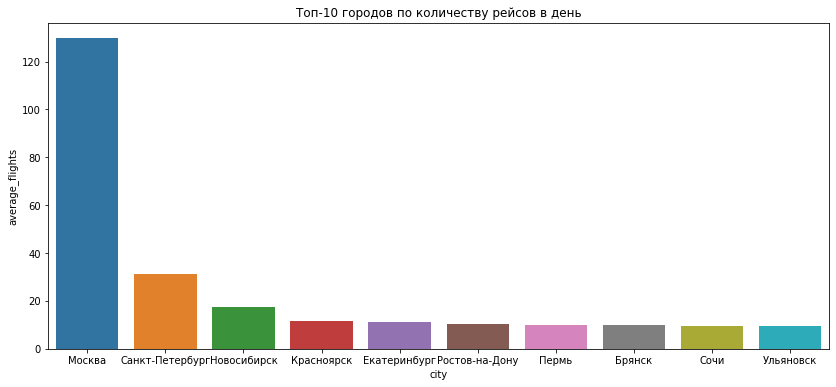

In [4]:
top10city = data3.sort_values('average_flights', ascending=False).head(10)
print(top10city)
fig, ax = pyplot.subplots(figsize=(14, 6))
ax.set_title('Топ-10 городов по количеству рейсов в день')
sns.barplot(x='city', y="average_flights", data=top10city)

Топ-10 городов по количеству рейсов в день в августе 2018: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

Абсолютный лидер - Москва, на ней идет Санкт-Петербург. 

В остальные города из топ-10 прибывает в среднем 10-17 рейсов день.

###  3. График по моделям самолетов и количеству рейсов в сентябре 2018 года

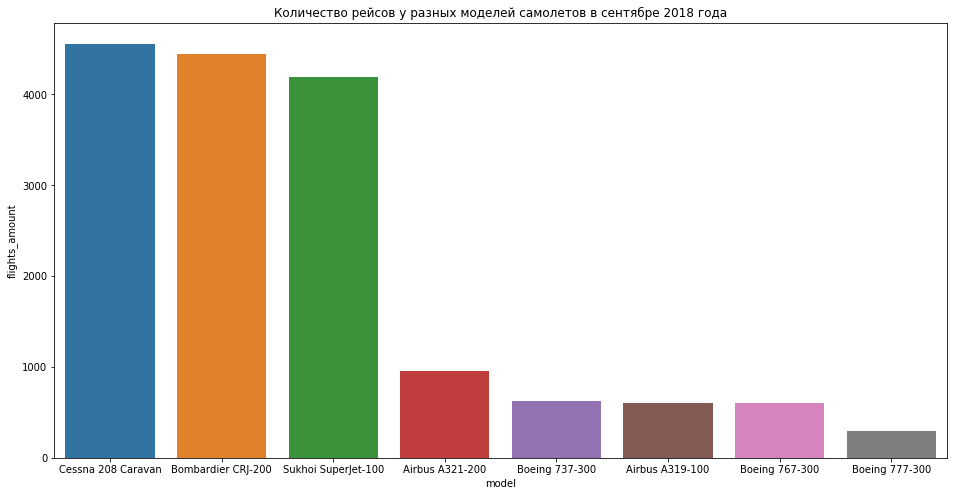

In [5]:
data1 = data1.sort_values('flights_amount', ascending=False)


fig, ax = pyplot.subplots(figsize=(16, 8))
ax.set_title('Количество рейсов у разных моделей самолетов в сентябре 2018 года')
sns.barplot(x='model', y="flights_amount", data=data1)


Топ-3 моделей по количеству рейсов в сентябре 2018 года: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100.

Такое распределение скорее всего обусловлено тем, что чем большее расстояние может покрыть самолет, тем меньшее он количество рейсов может совершить за месяц: так, легкая одномоторная Cessna за месяц может совершить больше коротких частных перевозок на близкие расстояния, а огромный Boeing 777-300 летает на дальние расстояния и на один полет тратит существенно больше времени, и соответственно, совершает гораздо меньшее количество полетов. 

###  4. График по всем городам и среднему количеству рейсов в день, прибывающих в города в августе 2018 года.

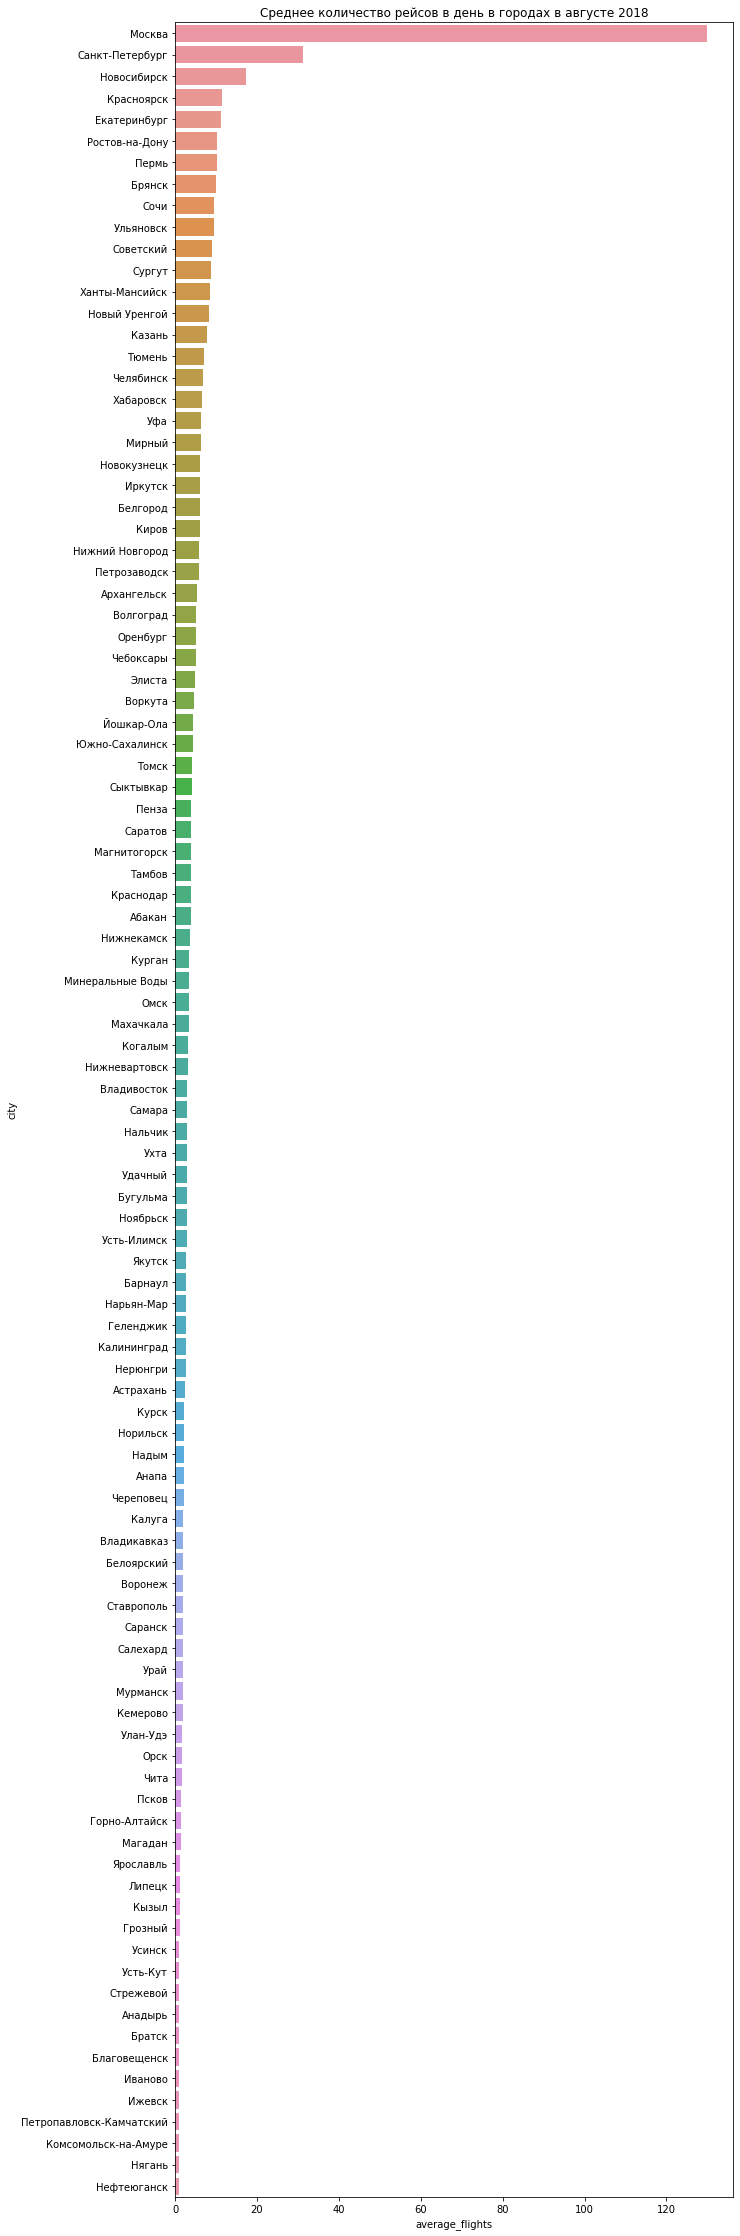

In [6]:
data3 = data3.sort_values('average_flights', ascending=False)
fig, ax = pyplot.subplots(figsize=(10, 40))
ax.set_title('Среднее количество рейсов в день в городах в августе 2018')
sns.barplot(x='average_flights', y="city", data=data3, orient="h")

Лидеры городов по количеству рейсов в день в августе 2018 Москва и Санкт-Петербург, в среднем в день туда прибывает 130 и 31 рейс соответственно. 

Меньше всего рейсов прибывает в Нефтеюганск, Нягань, Комсомольск-на-Амуре и Петропавловск-Камчатский - в среднем в день туда прибывает 1 рейс.


## Вывод:

- Топ-10 городов по количеству рейсов в день в августе 2018: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

    Абсолютный лидер - Москва, на ней идет Санкт-Петербург. Это логично, как это 2 самых больших города в РФ.

    В остальные города из топ-10 прибывает в среднем 10-17 рейсов день.

    Меньше всего рейсов прибывает в Нефтеюганск, Нягань, Комсомольск-на-Амуре и Петропавловск-Камчатский - в среднем в день туда прибывает 1 рейс.


- Топ-3 моделей по количеству рейсов в сентябре 2018 года: Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100. Такое распределение вероятно обусловлено тем, что чем большее расстояние может покрыть самолет, тем меньшее он количество рейсов может совершить за месяц.